# Assignment 1: Exploratory Data Analysis
- Group Number: Group 129
- Name: Uzair Mohiuddin
- Student Number: 8737165

## Introduction
### Goal of Analysis
The goal of the analysis is to perform "Exploratory Data Analysis (EDA)" on two datasets in different domains to uncover key insights using descriptive statistics, inferential analytics, and visualization techniques. 

The objective is to:
- Use descriptive analytics to under distribution of data using central tendency and dispersion measures.
- Perform hypothesis testing to understand correlations between factors.
- Generate insights that may be useful in decision-making. 

### Target Audience 
This report is intended for data scientists or domain experts who are interested in understanding the insights from the data and using it to make informed decisions.

In particular, the audience for the report includes:
- **Healthcare Professionals and Researchers**: For the heart failure prediction dataset. It will help them better understand health indicates that my predict heart failure.
- TBD

## Dataset 1: Heart Failure Prediction Dataset
- **Source**: Kaggle
- **Kaggle Link**: [Link](https://can01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Ffedesoriano%2Fheart-failure-prediction&data=05%7C02%7Ccbarrier%40uottawa.ca%7C68262d9c3f5f4f49010008dd3593f94d%7Cd41fdab17e154cfdb5fa7200e54deb6b%7C1%7C0%7C638725631828660312%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=iQeGvPMQjEkVKAdXrRRzmnoFS2yuyvxwvxXh4Hu7gNU%3D&reserved=0)
- **Rows and Columns**: 918 rows x 12 columns

### Description
- **Name**: Heart Failure Prediction Dataset
- **Author**: fedesoriano
- **Purpose**: Cardiovascular diseases (CVDs) is a significant reason for mortality. One event characteristic for CVDs is heart failure. This dataset combines 5 datasets, to identify 11 features that can help predict heart disease.
- **Shape**: 918 rows x 12 columns
- **Features of Dataset**:
| Feature        | Categorical/Numerical | Description |  Metrics | 
| -------------- | --------------------- | ---------------------- | -- |
| Age            | Numerical (int64)     | Represents the age of the patient. | Years |
| Sex            | Categorical (object)  | Represents the sex of the patient. | M/F | 
| ChestPainType  | Categorical (object)  | Represents the type of chest pain (typical angina, atypical angina, non-anginal pain, asymptomatic | TA/ATA/NAP/ASY |
| RestingBP      | Numerical (int64)     | Represents the resting blood pressure | mmHg |
| Cholesterol    | Numerical (int64)     | Represents the serum cholesterol. | mm/dl |
| FastingBS      | Numerical (int64)     | Represents the fasting blood sugar (>120 mg/dl, or otherwise). | 1/0 |
| RestingECG     | Categorical (object)  | Represents resting electrocardiogram results (Normal, ST-T Wave Abnormality, Left Ventricular Hypertrophy | Normal/ST/LVH |
| MaxHR          | Numercial (int64)     | Represents the maximum heart rate. | 60-202 |
| ExerciseAngina | Categorical (object)  | Represents exerice-induced angina. | Y/N |
| Oldpeak        | Numerical (float64)   | Oldpeak is a numerical value for depression uduced by exercise. | ST Value |
| ST_Slope       | Categorical (object)  | The slope of the peak exercise ST segment. | Up/Flat/Down |
| HeartDisease   | Numerical (int64)     | Output Class (1: Heart Disease, 0: Normal) | 0/1 |

### Summary of 10 Insights
1. 75% of the individuals are above 47 years old.
2. Majority of individuals are male (728/918).
3. The most common type of chest pain is Asymptomatic Chest Pain (ASY), with more than 50% of individuals experiencing this type of chest pain. The least common type of chest pain is Typical Angina (TA).
4. Among all individuals, there is an almost equal distribution of individuals with low (<200 mg/dL), medium (200-239 mg/dL) and high (>240 mg/dL) cholesterol levels.
5. In cases of Heart Disease, the prevalence of the individual being male is almost 5-6 times more than being female. Whereas, in cases of no heart disease, it is a similar prevalence of male and female.
6. Among individuals with heart disease, Asymptomatic Angina (ASY) is experienced more than 4X as often as any other chest pain type. Furthermore, Atypical Angina (ATA) and Non-Anginal Pain (NAP) is found in both groups, but has a higher prevalence in the group with no heart disease.
7. Individuals who experience Asymptomatic Chest Pain (ASY) experience a higher prevalence of a Flat ST_Slope indicated reduced blood flow to heart. For individuals with a normal heart (Up ST_Slope), they experience similar levels of chest pain across all types (except a lower prevalence of typical angina (TA)).
8. There is a negative correlation between age and maximum heart rate, confirming that heart efficiency declines with age. 
9. There appears to be no relation between Cholesterol and Max Heart Rate.
10. Individuals with heart disease have a larger median age and there IQR for their age is larger than those without heart disease.
11. The strongest correlation between numerical values is moderate and exists between Heart Disease and MaxHR (-0.4), and HeartDisease and OldPeak (0.4). There is also a moderate negative correlation between MaxHR and Age (-0.38).

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# URL for dataset
heart_disease_dataset_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment1/heart.csv"

# Load dataset
df = pd.read_csv(heart_disease_dataset_url)

In [3]:
# Retrieve shape of dataset
df.shape

(918, 12)

In [4]:
'''
Get a list of the features and descriptions
- We see the columns and Dtype.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
'''
describe() generates descriptive statistics to summarize central tendency, dispersion, and shape. 
Retrieves numerical attributes

Numerical Attributes are: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease
'''
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
'''
Categorical attributes of the dataset
- Categorical attributes are: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
'''
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## Insight #1 (Heart Failure Prediction Dataset)
- **Insight**: 75% of the individuals are above 47 years old. 
- **Type of Analysis**: r1: Univariate analysis (Numerical Data - Simple Histogram)

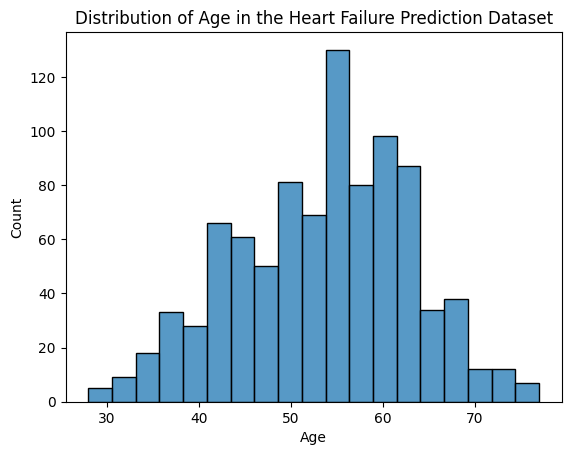

In [7]:
# Histogram of the Age column.
sns.histplot(data=df, x="Age")
plt.xlabel("Age")
plt.title("Distribution of Age in the Heart Failure Prediction Dataset")
plt.show()

In [8]:
# Numerical evidence of most patients being older than 47.
df[["Age"]].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


## Insight #2 (Heart Failure Prediction Dataset)
- **Insight**: Majority of individuals are male (728/918). 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

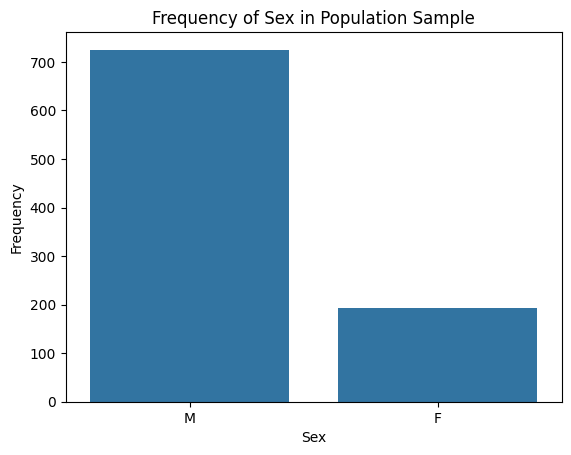

In [9]:
# Countplot to display count of Sex
sns.countplot(x="Sex", data=df)
plt.ylabel("Frequency")
plt.title("Frequency of Sex in Population Sample")
plt.show()

In [10]:
# Data regarding sex to back-up the diagram
df["Sex"].describe()

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

## Insight #3 (Heart Failure Prediction Dataset)
- **Insight**: The most common type of chest pain is Asymptomatic Chest Pain (ASY), with more than 50% of individuals experiencing this type of chest pain. The least common type of chest pain is Typical Angina (TA). 
- **Type of Analysis**: r2: Univariate analysis (Categorical Data - Countplot)

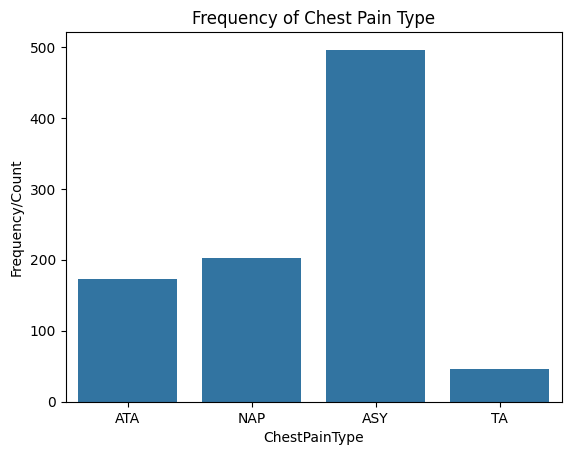

In [11]:
# Countplot to show the count of different types of chest pain
sns.countplot(x="ChestPainType", data=df)
plt.title("Frequency of Chest Pain Type")
plt.ylabel("Frequency/Count")
plt.show()

In [12]:
# Descriptive analytics to support countplot
df["ChestPainType"].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

## Insight #4 (Heart Failure Prediction Dataset)
- **Insight**: Among all individuals, there is an almost equal distribution of individuals with low (<200 mg/dL), medium (200-239 mg/dL) and high (>240 mg/dL) cholesterol levels.
- **Type of Analysis**: r3: Univariate analysis (Categorical Data - Grouped-Data Countplot)

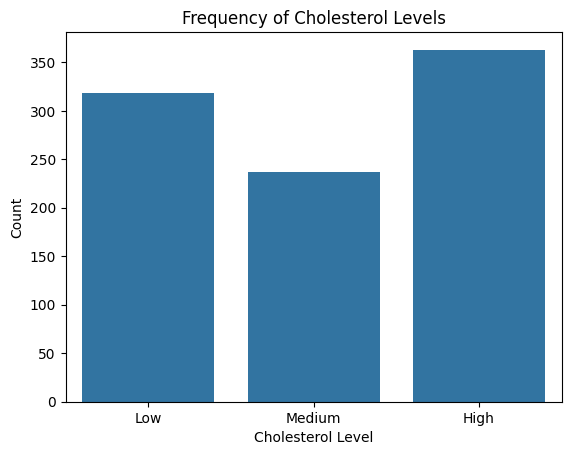

In [13]:
# Make a copy of the dataframe
df_copy = df.copy(deep=True)

'''
Group Cholesterol into high, medium and low 
- high = 240mg/dl or higher
- medium = 200-239 mg/dl
- low = less than 200 mg/dl
'''

df_copy['Cholesterol'] = pd.cut(df['Cholesterol'], bins=[-1000, 199, 239, 10000], labels=['Low', 'Medium', 'High'])

sns.countplot(x="Cholesterol", data=df_copy)
plt.title("Frequency of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

In [14]:
# Values corresponding to the above count plot 
df_copy['Cholesterol'].value_counts()

Cholesterol
High      363
Low       318
Medium    237
Name: count, dtype: int64

## Insight #5 (Heart Failure Prediction Dataset)
- **Insight**: In cases of Heart Disease, the prevalence of the individual being male is almost 5-6 times more than being female. Whereas, in cases of no heart disease, it is a similar prevalence of male and female.
- **Type of Analysis**: r4: Bivariate analysis (Categorical Data - Compare categories with 2 values)

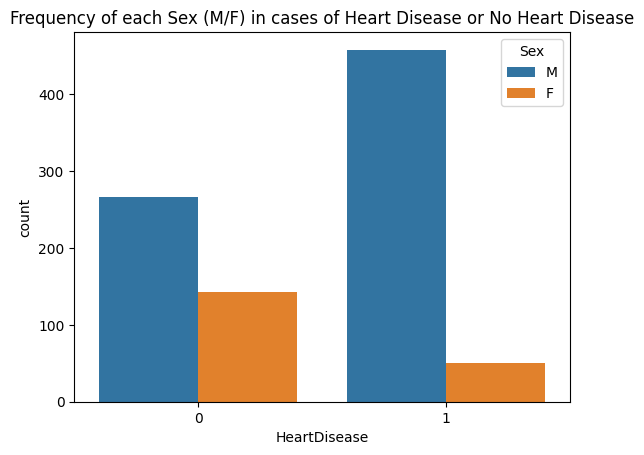

In [15]:
'''
Countplot taking a look at two categories (Sex and HeartDisease)
'''
sns.countplot(x="HeartDisease", hue="Sex", data=df)
plt.title("Frequency of each Sex (M/F) in cases of Heart Disease or No Heart Disease")
plt.show()

In [16]:
'''
Count data for the cross tabulation of Sex and HeartDisease.
'''
male = df[df['Sex'] == 'M']
female = df[df['Sex'] == 'F']

male_heart_disease = male['HeartDisease']
female_heart_disease = female['HeartDisease']

t_stat, p_value = stats.ttest_ind(male_heart_disease, female_heart_disease)
print("t-value is", t_stat)
print("p-value is", p_value)

pd.crosstab(df['Sex'], df['HeartDisease'], margins=True)

t-value is 9.708407894487765
p-value is 2.8218978236832577e-21


HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


## Insight #6 (Heart Failure Prediction Dataset)
- **Insight**: Among individuals with heart disease, Asymptomatic Angina (ASY) is experienced more than 4X as often as any other chest pain type. Furthermore, Atypical Angina (ATA) and Non-Anginal Pain (NAP) is found in both groups, but has a higher prevalence in the group with no heart disease. 
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categories Data - Compare categories with more than 2 values)

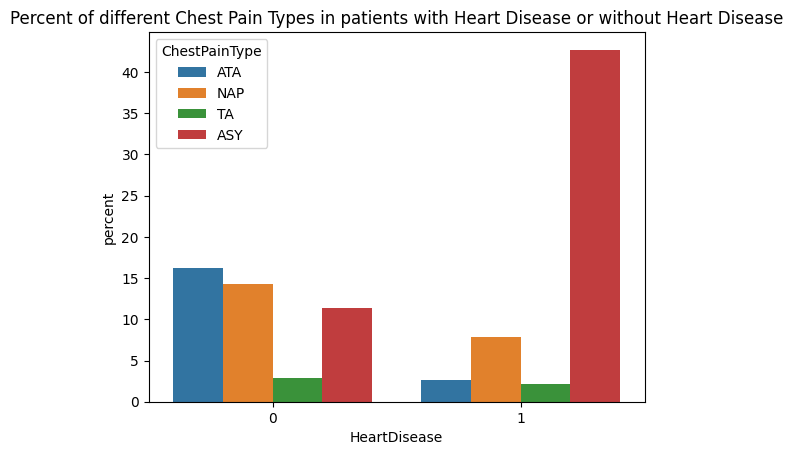

In [17]:
'''
Countplot to compare HeartDisease with ChestPainType.
'''
sns.countplot(x="HeartDisease", hue="ChestPainType", data=df, stat="percent")
plt.title("Percent of different Chest Pain Types in patients with Heart Disease or without Heart Disease")
plt.show()

In [18]:
'''
Count data for the cross tabulation of ChestPainType and HeartDisease.
- In patients with Heart Disease, 392/508 have Asymptomatic Chest Pain.
- In patients without heart disease, ASY, ATA, and NAP have a similar prevalence.
'''
pd.crosstab(df['HeartDisease'], df['ChestPainType'], margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
HeartDisease,,,,,
0,104,149,131,26,410
1,392,24,72,20,508
All,496,173,203,46,918


## Insight #7 (Heart Failure Prediction Dataset)
- **Insight**: Individuals who experience Asymptomatic Chest Pain (ASY) experience a higher prevalence of a Flat ST_Slope indicated reduced blood flow to heart. For individuals with a normal heart (Up ST_Slope), they experience similar levels of chest pain across all types (except a lower prevalence of typical angina (TA)).
- **Type of Analysis**: r5: Bivariate analysis (Categorical/Categorical - Compare categories with more than 2 values)

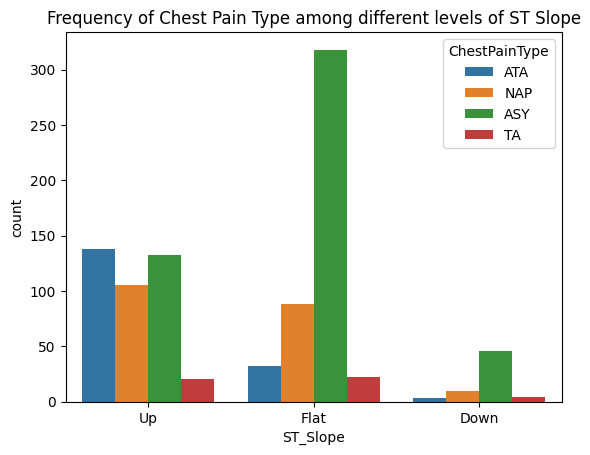

In [19]:
'''
Bivariate countplot comparing ST_Slope and ChestPainType.
- ST_Slope measured the slope of the ST Segment during exercise. 
  - Flat means potentially reduced blood flow.
  - Up means normal heart.
  - Down means high risk of heart disease. 
'''

sns.countplot(x="ST_Slope", hue="ChestPainType", data=df)
plt.title("Frequency of Chest Pain Type among different levels of ST Slope")
plt.show()

In [20]:
'''
Count data for the cross tabulation of ChestPainType and HeartDisease.
- In patients with Heart Disease, 392/508 have Asymptomatic Chest Pain.
- In patients without heart disease, ASY, ATA, and NAP have a similar prevalence.
'''
pd.crosstab(df['ST_Slope'], df['ChestPainType'], margins=True)

ChestPainType,ASY,ATA,NAP,TA,All
ST_Slope,,,,,
Down,46,3,10,4,63
Flat,318,32,88,22,460
Up,132,138,105,20,395
All,496,173,203,46,918


## Insight #8 (Heart Failure Prediction Dataset)
- **Insight**: There is a negative correlation between age and maximum heart rate, confirming that heart efficiency declines with age. 
- **Type of Analysis**: r6: Bivariate Analysis (Numerical/Numerical - Scatterplot)

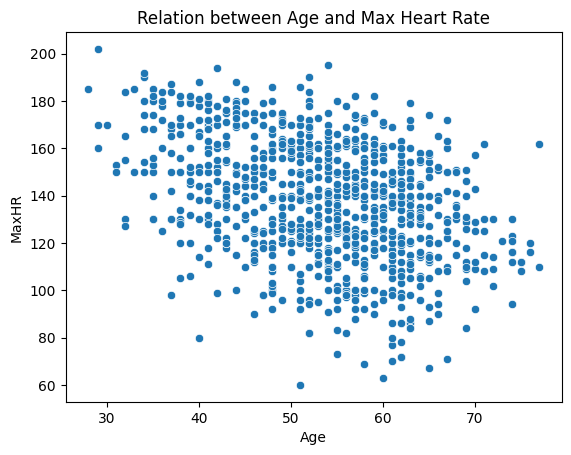

In [21]:
'''
Plot relationship between Age and MaxHR.
'''
sns.scatterplot(x="Age", y="MaxHR", data=df)
plt.title("Relation between Age and Max Heart Rate")
plt.show()

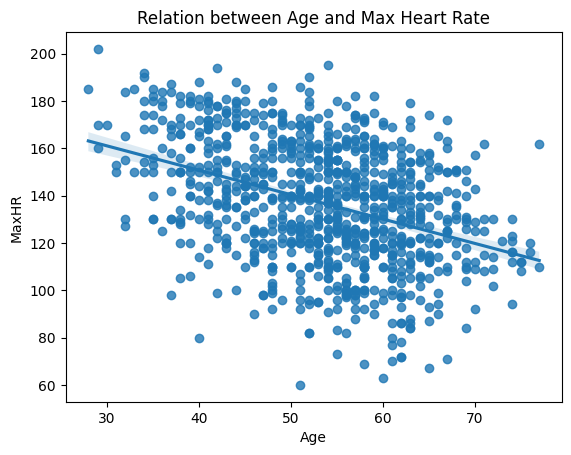

T-Test for MaxHR between Heart Disease vs. No Heart Disease: t-stat=-13.22548998290478, p-value=1.1377859840278097e-36


In [22]:
'''
To better visualize the trend, we can use regplot.
'''
sns.regplot(x="Age", y="MaxHR", data=df)
plt.title("Relation between Age and Max Heart Rate")
plt.show()

t_stat, p_value = stats.ttest_ind(df[df['HeartDisease']==1]['MaxHR'], df[df['HeartDisease']==0]['MaxHR'])
print(f"T-Test for MaxHR between Heart Disease vs. No Heart Disease: t-stat={t_stat}, p-value={p_value}")

## Insight #9 (Heart Failure Prediction Dataset)
- **Insight**: There appears to be no relation between Cholesterol and Max Heart Rate. 
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical - Scatterplot)

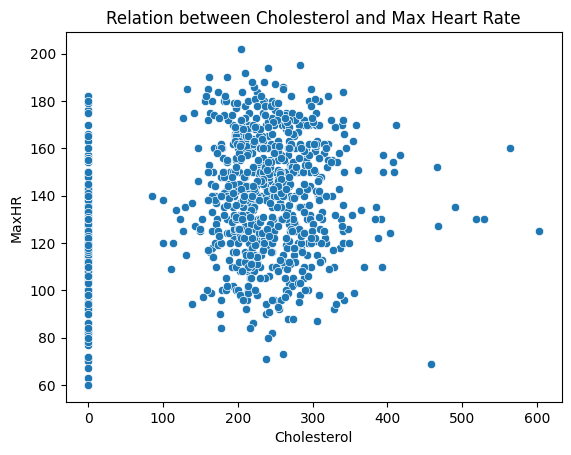

In [23]:
'''
Plot relationship between Age and MaxHR.
'''
sns.scatterplot(x="Cholesterol", y="MaxHR", data=df)
plt.title("Relation between Cholesterol and Max Heart Rate")
plt.show()

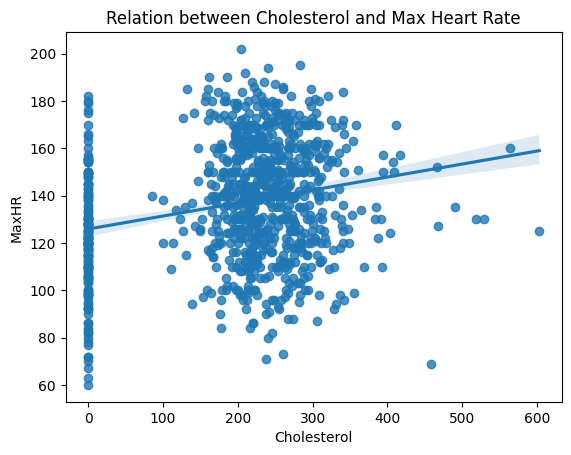

In [24]:
'''
To better visualize the trend, we can use regplot.
'''
sns.regplot(x="Cholesterol", y="MaxHR", data=df)
plt.title("Relation between Cholesterol and Max Heart Rate")
plt.show()

## Insight #10 (Heart Failure Prediction Dataset)
- **Insight**: Individuals with heart disease have a larger median age and there IQR for their age is larger than those without heart disease. 
- **Type of Analysis**: r7: Bivariate analysis (Numerical/Categorical - Split data by certain categories)

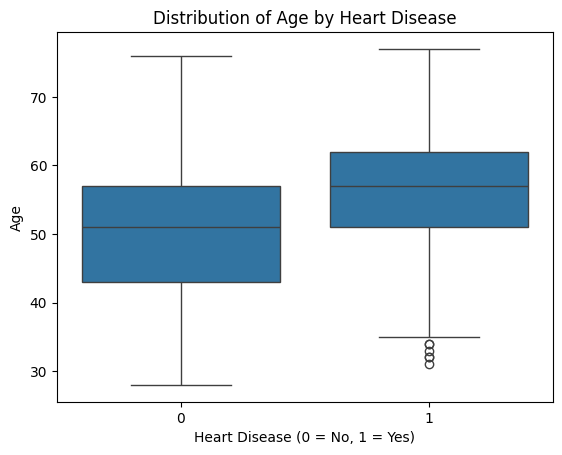

In [25]:
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Distribution of Age by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

## Additional Insight
- **Insight**: The strongest correlation between numerical values is moderate and exists between Heart Disease and MaxHR (-0.4), and HeartDisease and OldPeak (0.4). There is also a moderate negative correlation between MaxHR and Age (-0.38).
- **Type of Analysis**: r6: Bivariate analysis (Numerical/Numerical - Scatterplot/Heatmap)

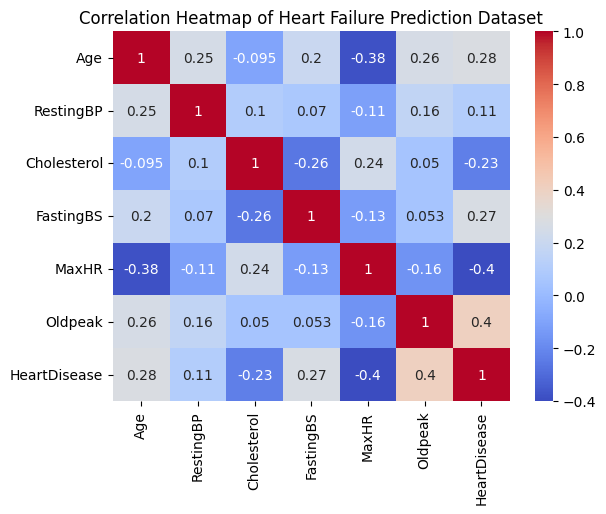

In [26]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Failure Prediction Dataset")
plt.show()

## Conclusion
### Key Takeaways
1. Men are more likely to have heart disease.
2. Those with heart disease have a significant likelihood to experience asymptomatic chest pain.
3. There is no standalone relationship between cholesterol levels and heart disease.
4. Max heart rate decreases with age, and older individuals are more likely to have heart disease. 
5. There is reduced flow to heart (ST_Slope) with individuals have asymptomatic chest pain.

## References
- (Kaggle Dataset)[https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data]
- (Pandas Docs)[https://pandas.pydata.org/docs/reference/index.html]
- (Seaborn Docs)[https://docs.scipy.org/doc/scipy/reference/index.html]
